In [1]:
# HCASE Experiments CANVASS into HCASE ChEMBL
#
# Author: Gergely Zahoranszky-Kohalmi, PhD
#
# Email: gergely.zahoranszky-kohalmi@nih.gov
#
# Organization: National Center for Advancing Translational Sciences (NCATS/NIH)
#

In [2]:
import hcase
import pandas as pd

import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Config section



fname_reference_scaffolds = '../data/scaffolds_chembl_24.tab'
fname_structures = '../data/STD_FINAL_20170525_ML_CANVASS_deduplicated.txt'


fname_out_space = '../data/hc_space.tab'
fname_out_embedding = '../data/canvass_emb_hcase_chembl_24_1_bms_dim_2.tab'


fname_out_CANVASS_hcase_chembl_embedding_plot = '../plots/comparative_embeddings/canvass_chembl_24_1_bms_dim_2.png'


n_dim = 2



use_precomputed_reference_space = True

do_downsampling = False
rnd_seed = 55555
sample_size = 200



In [4]:
# Import datasets

df_ref_scaffolds = pd.read_csv (fname_reference_scaffolds, sep = '\t')
df_structures = pd.read_csv (fname_structures, sep = '\t')



In [5]:
# Functions

def create_plot_canvass_into_hcase_chembl (subfig, df, subfig_label):

    subfig.scatter(df['Dim_1'].values, df['Dim_2'].values, alpha = 0.3, marker = 'o', s = 10)

    subfig.set_title (subfig_label, fontsize=24)
    subfig.set_xlabel ('Dim 1', fontsize=20)
    subfig.set_ylabel ('Dim 2', fontsize=20)
    
    return(subfig)



In [6]:
# Clean-up datasets

df_structures = df_structures.rename (columns = {'Structure': 'structure', 'ID': 'id'})





In [7]:
# Reduce datasets for workflow development (optional)

if do_downsampling:

    df_ref_scaffolds = df_ref_scaffolds.sample (n = sample_size, random_state = rnd_seed)
    df_structures = df_structures.sample (n = sample_size, random_state = rnd_seed)



In [8]:
# Create ChEMBL Scaffold space

if not use_precomputed_reference_space:
    
    df_hcase_space = hcase.train (df_ref_scaffolds)
    df_hcase_space.to_csv (fname_out_space, sep = '\t', index = False)

else:
    
    df_hcase_space = pd.read_csv (fname_out_space, sep = '\t')


In [9]:
# Embed structures into HCASE space

print (df_structures.head)
    
df_embedded = hcase.embed (df_hcase_space, df_structures, n_dim)




<bound method NDFrame.head of                                              structure               id  \
0                          CN1C=NC2C1C(=O)N(C)C(=O)N2C  NCGC00488574-01   
1    C[C@]1(CCC(=O)NC2=C(O)C(=CC=C2O)C(O)=O)C3CC4C(...  NCGC00488516-01   
2    C[C@]1(CCC(=O)NC2=C(O)C(=CC=C2O)C(O)=O)C3CC4CC...  NCGC00488517-01   
3    CC(CCC1CCC(C)(C2CCC(=C)C[C@]12C)C(O)=O)=CC(=O)...  NCGC00488521-01   
4             CCCCCC(=O)NC(CC(C)C)C(=O)NC(CCC(O)=O)C=O  NCGC00488512-01   
..                                                 ...              ...   
338  COC1=C(C)C2=C(OC3=C(Cl)C(=C(Cl)C(=C3C(=O)O2)C)...  NCGC00380835-02   
339     CCCCCCCC(CC=CCCC(=O)NCCC1=C[NH]C2=C1C=CC=C2)OC  NCGC00488476-01   
340  CC(=O)OC1CC[C@@]2(C)C(CC[C@]3(C)C2CC=C4C5CC(C)...  NCGC00179084-04   
341  CC1CCC(O)[C@@]2(CCC=C(C)C)C3=CC4=C([NH]C5=C4C=...  NCGC00488589-01   
342    CCCCCCCCCCCCCCCC(=O)OC\C=C(/C)CCCC(C)CC(C)C(C)C  NCGC00488586-01   

    MOLLIBRARY  MOLLIBRARY_INT  MOLLIBRARY_INT_StdDev    logS  logS_S

[20:50:52] Explicit valence for atom # 2 N, 4, is greater than permitted
[20:50:52] Explicit valence for atom # 1 N, 4, is greater than permitted
[20:50:52] Explicit valence for atom # 1 N, 4, is greater than permitted
[20:50:52] Explicit valence for atom # 11 N, 4, is greater than permitted
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] Can't kekulize mol.  Unkekulized atoms: 1 2 3 11 12 13 21 22 23

[20:50:53] SMILES Parse Error: syntax error for input: 'NA'
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] Can't kekulize mol.  Unkekulized atoms: 1 2 3 11 12 13 14 21 22

[20:50:53] SMILES Parse Error: syntax error for input: 'NA'
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] Can't kekulize mol.  Unkekulized atoms: 1 2 3 11 12 19 20 21 22

[20:50:53] SMILES Parse Error: syntax error 

[WARNING] SMILES: O=c1cc(-c2ccccc2)oc2cc(OC3CCCCO3)ccc12 cannot be processed by RDKit.
[WARNING] SMILES: O=c1cc(-c2ccccc2)oc2ccc(C3CCCCO3)cc12 cannot be processed by RDKit.
[WARNING] SMILES: O=c1cc(-c2ccccc2)oc2c(C3CCCCO3)cccc12 cannot be processed by RDKit.
[WARNING] SMILES: O=c1cc(-c2cccc(OC3CCCCO3)c2)oc2cc(OC3CCCCO3)ccc12 cannot be processed by RDKit.
[WARNING] SMILES: O=c1c(OC2CCCC(COC3CCCCO3)O2)c(-c2ccccc2)oc2ccccc12 cannot be processed by RDKit.
[WARNING] SMILES: O=c1c(OC2CCCCO2)c(-c2ccccc2)oc2ccccc12 cannot be processed by RDKit.
[WARNING] SMILES: O=c1cc(-c2ccccc2)oc2c(C3CCCCO3)cccc12 cannot be processed by RDKit.


[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] Can't kekulize mol.  Unkekulized atoms: 1 2 3 11 12 19 20 21 22

[20:50:53] SMILES Parse Error: syntax error for input: 'NA'
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] Can't kekulize mol.  Unkekulized atoms: 1 2 3 11 12 13 14 15 16

[20:50:53] SMILES Parse Error: syntax error for input: 'NA'
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo


[WARNING] SMILES: O=c1cc(-c2ccccc2)oc2ccccc12 cannot be processed by RDKit.


[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 16 17 19

[20:50:53] SMILES Parse Error: syntax error for input: 'NA'
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] WARNING: Omitted undefined stereo
[20:50:53] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 14 16 17 18

[20:50:53] SMILES Parse E

[WARNING] SMILES: O=C(Nc1cc2ccc(OC3CCCCO3)cc2oc1=O)c1ccccc1 cannot be processed by RDKit.
[WARNING] SMILES: O=C1C2=C(OC3(CCc4cc5ccoc(=O)c5cc4O3)C2)C(=O)c2ccccc21 cannot be processed by RDKit.
[WARNING] SMILES: O=C1OC[C@]23CC(C(=O)c4cccc1c42)C1c2cccc4c(=O)occ(c24)C(=O)C13 cannot be processed by RDKit.
[WARNING] SMILES: O=C1c2ccccc2OC(c2ccccc2)C1c1cccc2c(=O)cc(-c3ccccc3)oc12 cannot be processed by RDKit.
[WARNING] SMILES: O=C1c2cc3ccoc(=O)c3cc2CC2(C34Cc5cc6c(=O)occc6cc5C(=O)C3O4)OC12 cannot be processed by RDKit.


[20:50:53] WARNING: Omitted undefined stereo
[20:50:54] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 16 17 18 19 20 21 24 25 26

[20:50:54] SMILES Parse Error: syntax error for input: 'NA'
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21 22 24 25 33

[20:50:54] SMILES Parse Error: syntax error for input: 'NA'
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 8 10 11 12

[20:50:54] SMILES Parse Error: syntax error for input: 'NA'
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 9 10 11 12 13 14

[20:50:54] SMILES Parse Error: syntax error for input: 'NA'
[20:50:54] WARNING: Omit

[WARNING] SMILES: O=c1c2ccccc2oc2ccccc12 cannot be processed by RDKit.
[WARNING] SMILES: O=C(c1cc(-c2ccccc2)c[nH]c1=O)C1C=CC2CCCCC2C1 cannot be processed by RDKit.


[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] Can't kekulize mol.  Unkekulized atoms: 1 3 19 20 21

[20:50:54] SMILES Parse Error: syntax error for input: 'NA'
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo


[WARNING] SMILES: O=c1[nH]c(-c2c[nH]c3cccc(Cc4cnc[nH]4)c23)cnc1-c1c[nH]c2ccccc12 cannot be processed by RDKit.


[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:54] WARNING: Omitted undefined stereo
[20:50:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 11 12 13 14 15 16

[20:50:55] SMILES Parse Error: syntax error for input: 'NA'
[20:50:55] WARNING: Omitted undefined stereo


[WARNING] SMILES: O=c1cc(-c2ccccc2)oc2ccccc12 cannot be processed by RDKit.
[WARNING] SMILES: O=c1cc(-c2ccccc2)oc2ccccc12 cannot be processed by RDKit.
[WARNING] SMILES: O=c1ccc2ccc(OC3CCCCO3)cc2o1 cannot be processed by RDKit.


[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 11 12 13 14 15 16

[20:50:55] SMILES Parse Error: syntax error for input: 'NA'
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 15 16

[20:50:55] SMILES Parse Error: syntax error for input: 'NA'
[20:50:55] Can't kekulize mol.  Unkekulized atoms: 5 6 7 9 11

[20:50:55] SMILES Parse Error: syntax error for input: 'NA'
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 12

[20:50:55] SMILES Parse Error: syntax error for input: 'NA'
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo


[WARNING] SMILES: O=C1CCOc2ccoc(=O)c21 cannot be processed by RDKit.
[WARNING] SMILES: O=C(Nc1cc2ccccc2oc1=O)C1=NOC2CC=CCC2C1 cannot be processed by RDKit.


[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10

[20:50:55] SMILES Parse Error: syntax error for input: 'NA'
[20:50:55] WARNING: Omitted undefined stereo


[WARNING] SMILES: O=c1ccoc2ccccc12 cannot be processed by RDKit.
[WARNING] SMILES: O=c1c2ccccc2oc2ccccc12 cannot be processed by RDKit.
[WARNING] SMILES: O=c1cc(-c2ccccc2)oc2ccccc12 cannot be processed by RDKit.
[WARNING] SMILES: O=c1cc(-c2ccccc2)oc2ccccc12 cannot be processed by RDKit.


[20:50:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 9 10 11 12 13 14

[20:50:55] SMILES Parse Error: syntax error for input: 'NA'
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 11 12 13 14 15 16

[20:50:55] SMILES Parse Error: syntax error for input: 'NA'
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 11 12 13 14 15 16

[20:50:55] SMILES Parse Error: syntax error for input: 'NA'
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo


[WARNING] SMILES: O=C1c2ccc(=O)[nH]c2C(=O)c2[nH]c(=O)ccc21 cannot be processed by RDKit.
[WARNING] SMILES: O=c1cc(-c2ccccc2)oc2ccccc12 cannot be processed by RDKit.
[WARNING] SMILES: O=c1c2ccccc2oc2ccccc12 cannot be processed by RDKit.


[20:50:55] WARNING: Omitted undefined stereo
[20:50:55] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56] WARNING: Omitted undefined stereo
[20:50:56]

[*] Number of input structures: 332
[*] Number of structures for which scaffold_key was generated: 304
[*] Finding closest reference scaffold for structure 1 out of 304 .
[*] Finding closest reference scaffold for structure 2 out of 304 .
[*] Finding closest reference scaffold for structure 3 out of 304 .
[*] Finding closest reference scaffold for structure 4 out of 304 .
[*] Finding closest reference scaffold for structure 5 out of 304 .
[*] Finding closest reference scaffold for structure 6 out of 304 .
[*] Finding closest reference scaffold for structure 7 out of 304 .
[*] Finding closest reference scaffold for structure 8 out of 304 .
[*] Finding closest reference scaffold for structure 9 out of 304 .
[*] Finding closest reference scaffold for structure 10 out of 304 .
[*] Finding closest reference scaffold for structure 11 out of 304 .
[*] Finding closest reference scaffold for structure 12 out of 304 .
[*] Finding closest reference scaffold for structure 13 out of 304 .
[*] Findi

In [10]:
df_embedded.to_csv (fname_out_embedding, sep = '\t', index = False)

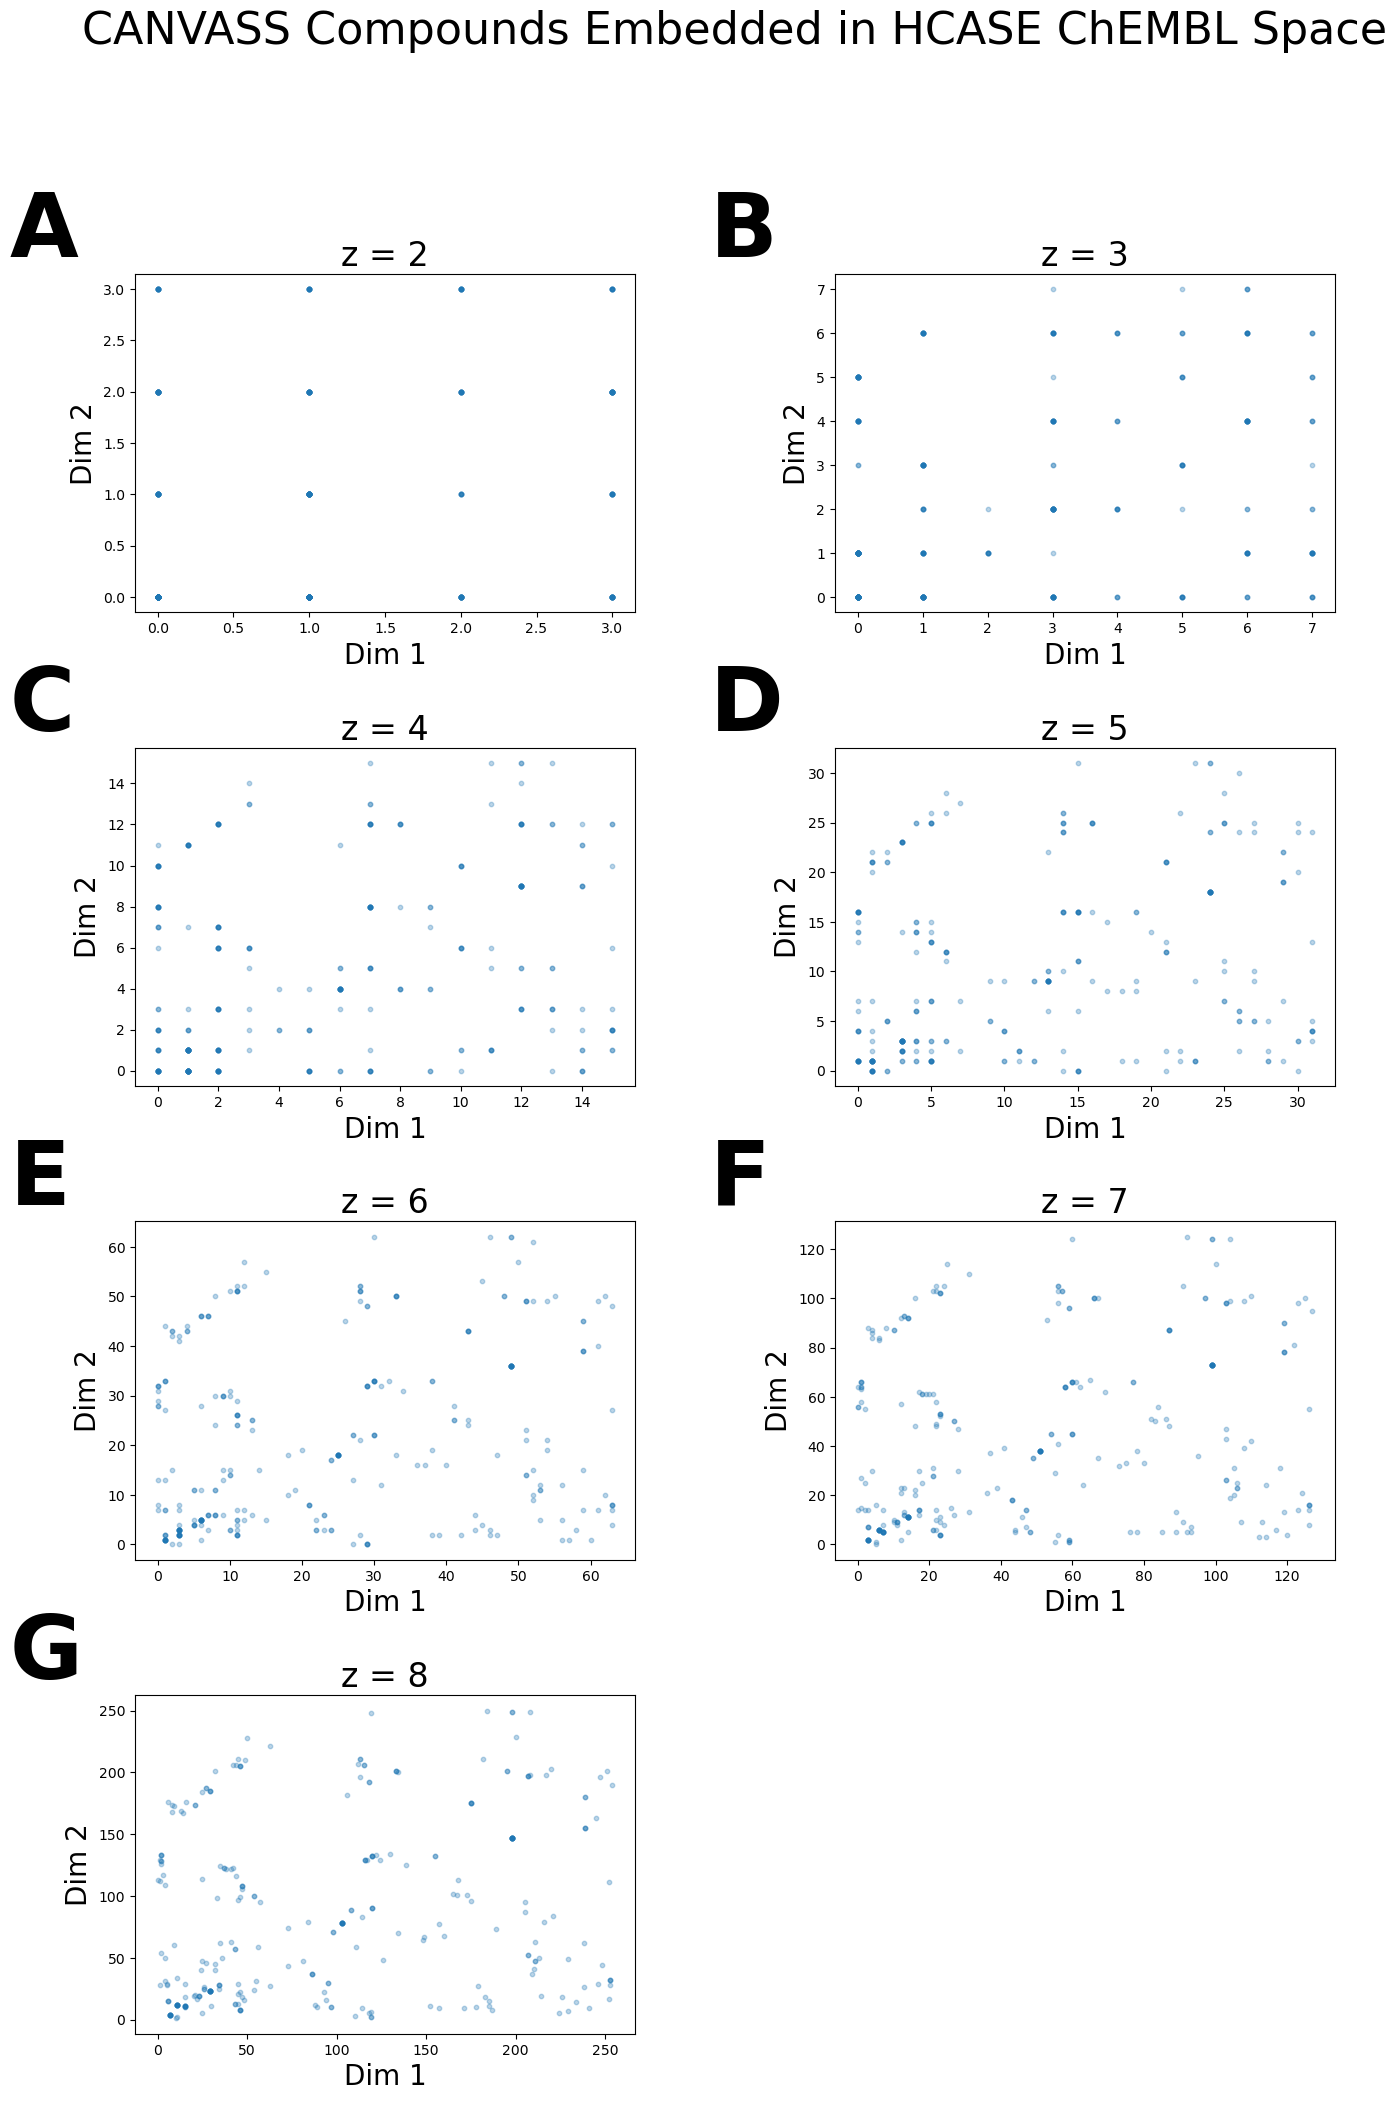

In [11]:
# Plotting


# Uncomment next line if just plotting needs to be run from embedding computed before
#df_embedded = pd.read_csv (fname_out_embedding, sep = '\t')

df_2 = df_embedded[df_embedded['hc_order'] == 2].copy()
df_3 = df_embedded[df_embedded['hc_order'] == 3].copy()
df_4 = df_embedded[df_embedded['hc_order'] == 4].copy()
df_5 = df_embedded[df_embedded['hc_order'] == 5].copy()
df_6 = df_embedded[df_embedded['hc_order'] == 6].copy()
df_7 = df_embedded[df_embedded['hc_order'] == 7].copy()
df_8 = df_embedded[df_embedded['hc_order'] == 8].copy()



fig, subfigures = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 22))


create_plot_canvass_into_hcase_chembl (subfigures[0][0], df_2, subfig_label = 'z = 2')
create_plot_canvass_into_hcase_chembl (subfigures[0][1], df_3, subfig_label = 'z = 3')
create_plot_canvass_into_hcase_chembl (subfigures[1][0], df_4, subfig_label = 'z = 4')
create_plot_canvass_into_hcase_chembl (subfigures[1][1], df_5, subfig_label = 'z = 5')
create_plot_canvass_into_hcase_chembl (subfigures[2][0], df_6, subfig_label = 'z = 6')
create_plot_canvass_into_hcase_chembl (subfigures[2][1], df_7, subfig_label = 'z = 7')
create_plot_canvass_into_hcase_chembl (subfigures[3][0], df_8, subfig_label = 'z = 8')


subfigures[3][1].axis('off')


subfigures[0][0].text(-0.25, 1.25, "A", transform=subfigures[0][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[0][1].text(-0.25, 1.25, "B", transform=subfigures[0][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][0].text(-0.25, 1.25, "C", transform=subfigures[1][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][1].text(-0.25, 1.25, "D", transform=subfigures[1][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[2][0].text(-0.25, 1.25, "E", transform=subfigures[2][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[2][1].text(-0.25, 1.25, "F", transform=subfigures[2][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[3][0].text(-0.25, 1.25, "G", transform=subfigures[3][0].transAxes,
            fontsize=64, fontweight='bold', va='top')

fig.suptitle('CANVASS Compounds Embedded in HCASE ChEMBL Space', fontsize = 32, y = 1.02)
#fig.supylabel('Dim 2')


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig (fname_out_CANVASS_hcase_chembl_embedding_plot, dpi=300)

plt.show()


In [12]:
# References:

# Ref: https://github.com/matplotlib/matplotlib/issues/3466/
# Ref: https://htmlcolorcodes.com/color-picker/
# Ref: https://iwatobipen.wordpress.com/2017/11/03/draw-high-quality-molecular-image-in-rdkit-rdkit/
# Ref: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
# Ref: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html
# Ref: https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers
# Ref: https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html
# Ref: https://matplotlib.org/3.1.1/tutorials/colors/colors.html
# Ref: https://python-graph-gallery.com/106-seaborn-style-on-matplotlib-plot/
# Ref: https://python-graph-gallery.com/122-multiple-lines-chart/
# Ref: https://python-graph-gallery.com/125-small-multiples-for-line-chart/
# Ref: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/
# Ref: https://seaborn.pydata.org/examples/many_facets.html
# Ref: https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
# Ref: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
# Ref: https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
# Ref: https://stackoverflow.com/questions/31686530/matplotlib-generate-a-new-graph-in-a-new-window-for-subsequent-program-runs/31686783
# Ref: https://stackoverflow.com/questions/39870642/matplotlib-how-to-plot-a-high-resolution-graph
# Ref: https://stackoverflow.com/questions/57568311/matplotlib-scatter-issue-with-python-3-x
# Ref: https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf
# Ref: https://www.pluralsight.com/guides/choosing-color-palettes
# Ref: https://www.rdkit.org/docs/GettingStartedInPython.html
# Ref: https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html
# Ref: https://www.science-emergence.com/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/
